<a href="https://colab.research.google.com/github/ManJ-PC/Natural-Language-Processing/blob/main/pessoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

In [2]:
import yfinance as yf
dat = yf.Ticker("MSFT")
dat

yfinance.Ticker object <MSFT>

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


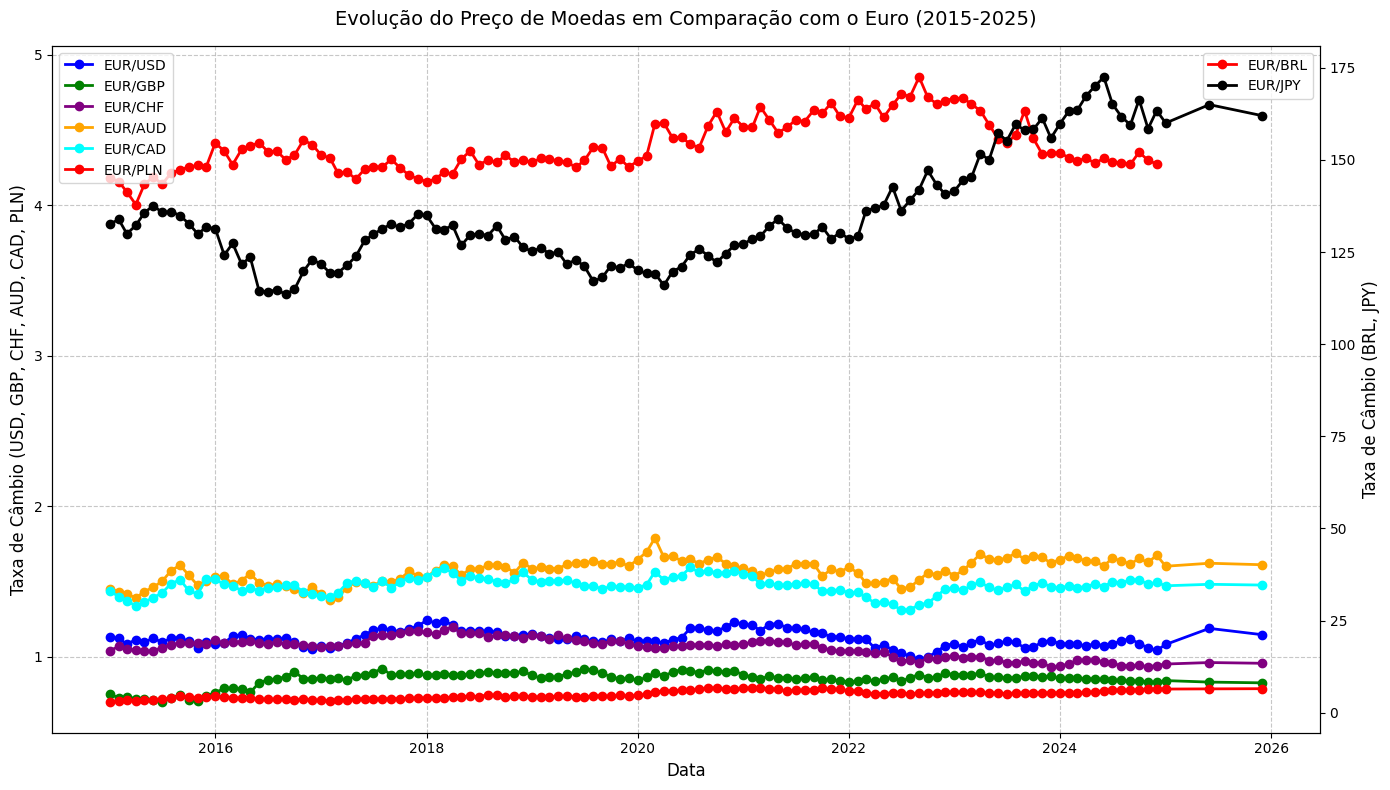

In [14]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# Definir pares de moedas (símbolos do Yahoo Finance)
pairs = {
    'EURUSD=X': 'EUR/USD',
    'EURBRL=X': 'EUR/BRL',
    'EURGBP=X': 'EUR/GBP',
    'EURJPY=X': 'EUR/JPY',
    'EURCHF=X': 'EUR/CHF',
    'EURAUD=X': 'EUR/AUD',
    'EURCAD=X': 'EUR/CAD',
    'EURPLN=X': 'EUR/PLN',
}

# Baixar dados históricos (2015-2024)
start_date = '2015-01-01'
end_date = '2024-12-31'
historical_data = {}
for symbol, name in pairs.items():
    df = yf.download(symbol, start=start_date, end=end_date, interval='1mo')['Close']
    historical_data[name] = df

# Criar DataFrame com dados históricos
df_historical = pd.concat(historical_data.values(), axis=1)
df_historical.columns = historical_data.keys()

# Adicionar projeções para 2025 (valores aproximados)
projections_data = {
    'Date': ['2025-01-01', '2025-06-01', '2025-12-01'],
    'EUR/USD': [1.0800, 1.1870, 1.1450],
    'EUR/BRL': [6.4000, 6.4500, 6.5000],
    'EUR/GBP': [0.8400, 0.8300, 0.8250],
    'EUR/JPY': [160.00, 165.00, 162.00],
    'EUR/CHF': [0.9500, 0.9600, 0.9550],
    'EUR/AUD': [1.6000, 1.6200, 1.6100],
    'EUR/CAD': [1.4700, 1.4800, 1.4750]
}

# Criar DataFrame para projeções
df_projections = pd.DataFrame(projections_data)
df_projections['Date'] = pd.to_datetime(df_projections['Date'])
df_projections = df_projections.set_index('Date')

# Renomear índice de df_historical para combinar com df_projections
df_historical.index.name = 'Date'

# Combinar dados históricos e projeções
df = pd.concat([df_historical, df_projections])

# Criar gráfico com dois eixos Y
fig, ax1 = plt.subplots(figsize=(14, 8))

# Eixo Y esquerdo: USD, GBP, CHF, AUD, CAD
colors = ['blue', 'green', 'purple', 'orange', 'cyan','red']
for i, col in enumerate(['EUR/USD', 'EUR/GBP', 'EUR/CHF', 'EUR/AUD', 'EUR/CAD', 'EUR/PLN']):
    ax1.plot(df.index, pd.to_numeric(df[col]), label=col, color=colors[i], marker='o', linewidth=2)
ax1.set_xlabel('Data', fontsize=12)
ax1.set_ylabel('Taxa de Câmbio (USD, GBP, CHF, AUD, CAD, PLN)', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc='upper left', fontsize=10)

# Eixo Y direito: BRL, JPY
ax2 = ax1.twinx()
ax2.plot(df.index, df['EUR/BRL'], label='EUR/BRL', color='red', marker='o', linewidth=2)
ax2.plot(df.index, df['EUR/JPY'], label='EUR/JPY', color='black', marker='o', linewidth=2)
ax2.set_ylabel('Taxa de Câmbio (BRL, JPY)', fontsize=12)
ax2.legend(loc='upper right', fontsize=10)

# Configurações gerais
plt.title('Evolução do Preço de Moedas em Comparação com o Euro (2015-2025)', fontsize=14, pad=15)
plt.xticks(rotation=45, fontsize=10)
fig.tight_layout()

# Exibir gráfico
plt.show()

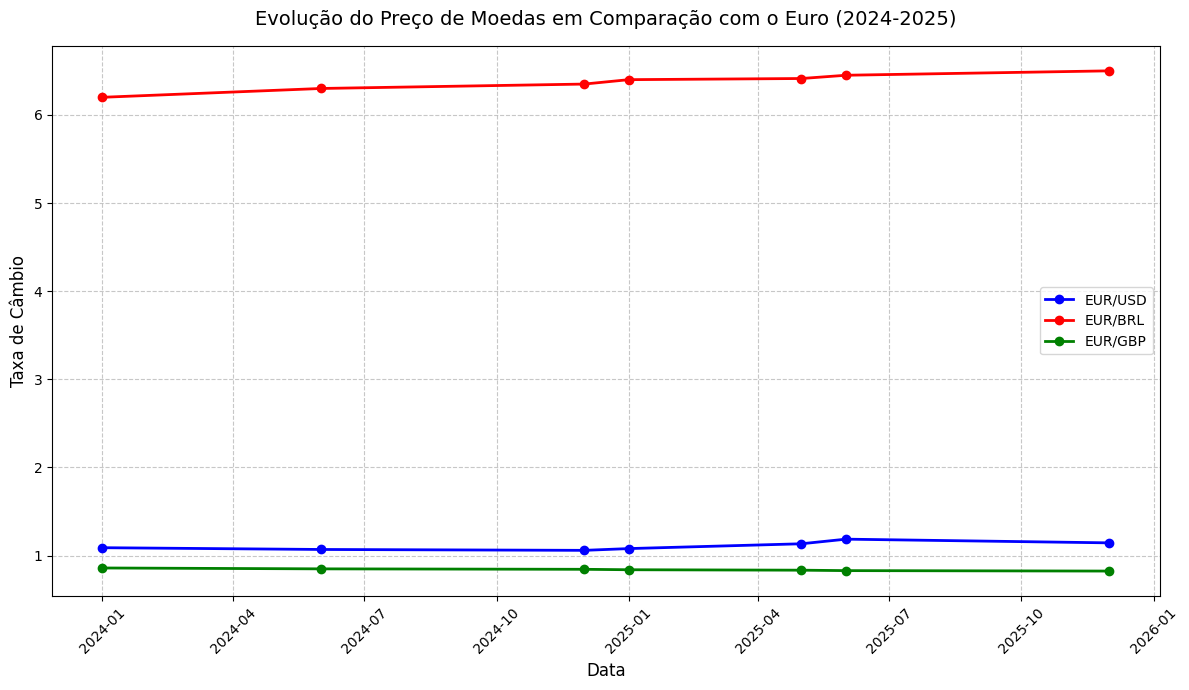

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados das taxas de câmbio
data = {
    'Data': ['2024-01-01', '2024-06-01', '2024-12-01', '2025-01-01', '2025-05-01', '2025-06-01', '2025-12-01'],
    'EUR/USD': [1.0900, 1.0700, 1.0600, 1.0800, 1.1346, 1.1870, 1.1450],
    'EUR/BRL': [6.2000, 6.3000, 6.3500, 6.4000, 6.4130, 6.4500, 6.5000],
    'EUR/GBP': [0.8600, 0.8500, 0.8450, 0.8400, 0.8350, 0.8300, 0.8250]
}

# Criar DataFrame
df = pd.DataFrame(data)
df['Data'] = pd.to_datetime(df['Data'])

# Criar o gráfico
plt.figure(figsize=(12, 7))

# Plotar cada série
plt.plot(df['Data'], df['EUR/USD'], label='EUR/USD', color='blue', marker='o', linewidth=2)
plt.plot(df['Data'], df['EUR/BRL'], label='EUR/BRL', color='red', marker='o', linewidth=2)
plt.plot(df['Data'], df['EUR/GBP'], label='EUR/GBP', color='green', marker='o', linewidth=2)

# Configurações do gráfico
plt.title('Evolução do Preço de Moedas em Comparação com o Euro (2024-2025)', fontsize=14, pad=15)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Taxa de Câmbio', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Ajustar layout para evitar cortes
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [ ]:
from functools import lru_cache
import time

In [ ]:
def is_prime(number):
  for n in range(2, number//2):
    if number % n == 0:
      return False
    return True

is_prime(73729259)

True

In [ ]:
# Medir tempo antes da cache
start = time.time()
print("Resultado (sem cache):", is_prime(73729259))
end = time.time()
print("Tempo sem cache:", end - start, "segundos")


Resultado (sem cache): True
Tempo sem cache: 0.001172780990600586 segundos


In [ ]:
# Medir tempo antes da cache
start = time.time()
print("Resultado (sem cache):", is_prime(73729259))
end = time.time()
print("Tempo sem cache:", end - start, "segundos")

Resultado (sem cache): True
Tempo sem cache: 0.00014853477478027344 segundos


In [ ]:
is_prime_cached = lru_cache(is_prime)

In [ ]:
# Primeira chamada com cache (será calculada)
start = time.time()
print("Resultado (com cache - 1ª chamada):", is_prime_cached(73729259))
end = time.time()
print("Tempo com cache (1ª):", end - start, "segundos")

Resultado (com cache - 1ª chamada): True
Tempo com cache (1ª): 0.0001652240753173828 segundos


In [ ]:
# Segunda chamada com cache (deve ser instantânea)
start = time.time()
print("Resultado (com cache - 2ª chamada):", is_prime_cached(73729259))
end = time.time()
print("Tempo com cache (2ª):", end - start, "segundos")

Resultado (com cache - 2ª chamada): True
Tempo com cache (2ª): 0.00012826919555664062 segundos


In [ ]:
# Segunda chamada com cache (deve ser instantânea)
start = time.time()
print("Resultado (com cache - 2ª chamada):", is_prime_cached(73729259))
end = time.time()
print("Tempo com cache (2ª):", end - start, "segundos")

Resultado (com cache - 2ª chamada): True
Tempo com cache (2ª): 0.0037119388580322266 segundos


In [ ]:
is_prime

<function __main__.is_prime(number)>

A decorator can instead be a class

which accepts a function

a return an instance of that class or
a fucntion which accpets a class and return a class

In [ ]:
class Square:
  def __init__(self, width):
    self .width = width

  @property
  def area(self):
    return self.width**2


In [ ]:
s = Square(3)

In [ ]:
s.area

9

In [ ]:
from dataclasses import dataclass

@dataclass
class Square2:
  width: float

  @property
  def area(self):
    return self.width**2

In [ ]:
s = Square2(width=2)
s.area

4

A decorator is a callable, usually a function.
Sometimes it's a class, but it's a callable that accepts either a function or a class and returns a new function or class that wraps the original one.

In [ ]:
property

property

In [ ]:
Square.area

In [ ]:
# In Software Development


In SDev sometiimes we need to add new functionality to  objects dynamically without altering their sctruture

Flexible solution
that allows us to extend an object's functionality at runtime without modifying the original code imagine you at a coffe shop ordering additions  (enhance its features and flavor) like:


*   cream
*   syrup
*   chocolate

decorator pattern is like adding these toppings to your coffee dynamically adding new functionalities to an object simply put the





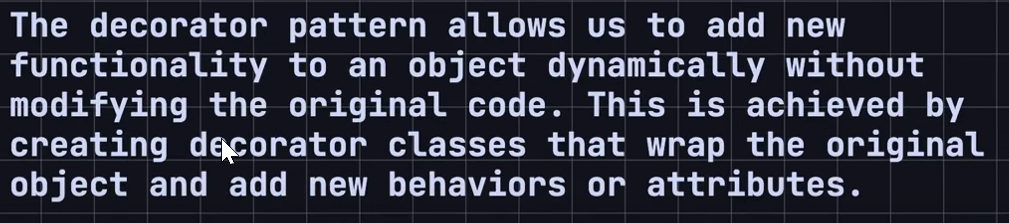

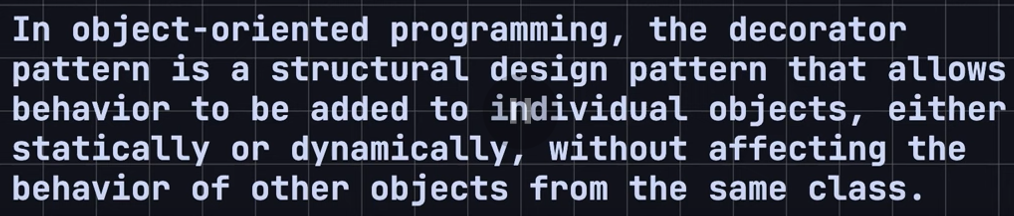

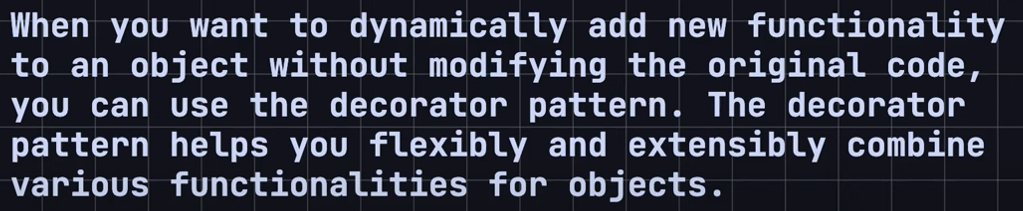

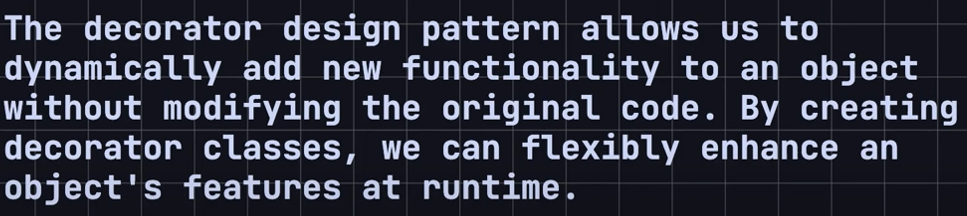

In [ ]:
fruits = ['kumquat', 'cherimoyak', 'Loquat', 'longan','jujube']
sorted(fruits)

['Loquat', 'cherimoyak', 'jujube', 'kumquat', 'longan']

In [ ]:
help(sorted)

Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.
    
    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



In [ ]:
def lowercase(string):
  return string.lower()

In [ ]:
lowercase('X')

'x'

In [ ]:
sorted(fruits, key=lowercase) # we can create also own function that accept a function as an argument.

['cherimoyak', 'jujube', 'kumquat', 'longan', 'Loquat']

In [ ]:
lowercase

<function __main__.lowercase(string)>

In [ ]:
def get_two(func, thing):
  return func(thing), func(thing)

In [ ]:
import random
get_two(random.randrange, 3) # random.randrange(start, stop) devolve um número aleatório entre start e stop - 1.


(0, 2)

In [ ]:
print(get_two(random.randrange, 3))
get_two(random.randrange, 3)

(1, 2)


(2, 1)

In [ ]:
def iteracao(atencao):
    def saudar(nome):
        return f"{atencao}, {nome}!"
    return saudar

bom_dia = iteracao("Escuta")
print(bom_dia("Manuel"))

Escuta, Manuel!


# Classificador de poemas do Fernando Pessoa
## Grupo Turing - NLP

## Passo 0: importando as bibliotecas

In [ ]:
import re
import unicodedata

import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import PortugueseStemmer
from langdetect import detect, DetectorFactory
import spacy

In [ ]:
nltk.download('stopwords')
tqdm.pandas()
DetectorFactory.seed = 42

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Passo 1: carregar o dataset e filtrar por autores mais frequentes

In [ ]:
dados = pd.read_csv('fernando_pessoa.csv')
dados.drop(['id', 'titulo', 'data', 'bibliografia'], inplace=True, axis=1)
dados.reset_index(drop=True, inplace=True)

Nesse passo, optamos por trabalhar com os autores com mais de 80 textos, pois menos que isso poderia ocasionar um sobreajuste.

In [ ]:
dados = dados.groupby('autor').filter(lambda x : (x['autor'].count()>=80).any())

Além disso, percebemos que no corpus há muitos textos em inglês, para isso utilizamos a função **detect** da biblioteca *langdetect*. Isso eliminou certa de 625 textos.

In [ ]:
dados['port'] = dados['texto'].progress_apply(lambda x: detect(x) != 'en')
dados = dados[dados['port'] == True]
dados.reset_index(inplace = True)

100%|██████████████████████████████████████████████████████████████████████████████| 4383/4383 [01:37<00:00, 44.91it/s]


## Passo 2: Preprocessamento: stemização, lematização, etc.

Ao analisar os textos, vimos que muitas palavras começavam com um travessão ou *underscore* indicador de diálogo. Para resolver tal problema, criamos a função `remover_underscore`, que lidou bem com o problema.

In [ ]:
def remover_underscore(palavra):
    if palavra[0] == '_' or palavra[-1] == '_':
        return palavra.replace('_', '')
    else:
        return palavra

Também percebemos que palavras acentuados prejudicam o modelo de stemização e de lematização, portanto optamos por remover todos os acentos. A função `remover_acento` talvez poderia ser mais simples, entretanto foi a solução encontrada.

In [ ]:
def remover_acento(texto):
    try:
        texto = unicode(texto, 'utf-8')
    except NameError:
        pass
    texto = unicodedata.normalize('NFD', texto)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")
    return str(texto)

Por último, tanto na stemização, quanto na lematização, foi importante remover _stopwords_ do texto. Para isso, usaremos a lista de stopwords em português que o NLTK fornece. Além disso, também usamos expressões regulares (*regex*) para eliminar quaisquer caracteres que pudessem poluir o texto.

In [ ]:
stopwords_pt = set(stopwords.words('portuguese'))

def remover_stopwords(texto, lista=False):
    palavras = re.findall(r'\b[A-zÀ-úü]+\b', texto.lower())
    sem_stopwords = [p for p in palavras if p not in stopwords_pt]
    if lista:
        return sem_stopwords
    else:
        return ' '.join(sem_stopwords)

### Passo 2.1: stemização utilizando SnowBall

Aqui criamos as duas funções mais importantes do preprocessamento do texto. A primeira, `stemizar`, recebe o texto não processado e o devolve com as palavras stemizadas e sem stopwords. Para isso, utilizamos o algoritmo *Snowball* criado por Martin Porter. A biblioteca do NLTK conta com um stemizador chamado `PortugueseStemmer` e é ele que utilizaremos.

In [ ]:
def stemizar(texto_original):
    palavras_importantes = remover_stopwords(texto_original, lista=True)

    stemizador = PortugueseStemmer()
    palavras = []

    for p in palavras_importantes:
        novo_p = remover_underscore(remover_acento(p))
        palavras.append(stemizador.stem(novo_p))
    return ' '.join(palavras)

### Passo 2.2: lematização utilizando spaCy

A outra função criada foi a `lematizar`. Similar à função anterior, essa função recebe o texto não processado e o devolve com os verbos lematizados. Para isso, utilizamos os modelos da biblioteca **spaCy**, a qual conta também com ferramentas de marcação de partes do discurso, utilizadas na função para separar os verbos a serem lematizados.

In [ ]:
nlp = spacy.load('pt_core_news_sm')

def lematizar(texto_original):
    palavras_importantes = remover_stopwords(texto_original, lista=True)

    texto_importante = ' '.join(palavras_importantes)
    texto_importante = remover_underscore(remover_acento(texto_importante))

    doc = nlp(texto_importante)
    doc_lematizado = [token.lemma_ if token.pos_ == 'VERB' else str(token) for token in doc]
    return ' '.join(doc_lematizado)

Finalmente, aplicamos as duas funções ao corpus, gerando as colunas *texto_stemizado*, *texto_lematizado*, *texto_sem_stopwords* e *texto_l_s* (combinação de lematização e stemização).

In [ ]:
dados['texto_stemizado'] = dados.texto.progress_apply(stemizar)
dados['texto_lematizado'] = dados.texto.progress_apply(lematizar)
dados['texto_l_s'] = dados.texto.progress_apply(lambda x: stemizar(lematizar(x)))
dados['texto_sem_stopwords'] = dados.texto.progress_apply(remover_stopwords)

100%|████████████████████████████████████████████████████████████████████████████| 3759/3759 [00:00<00:00, 4769.11it/s]


In [ ]:
dados.head()

,index,autor,tipo,texto,port,texto_stemizado,texto_lematizado,texto_l_s,texto_sem_stopwords
0,0,Ricardo Reis,poesia,Diana através dos ramos\nEspreita a vinda de E...,True,dian atrav ram espreit vind endymion endymion ...,diana atraves ramos espreitar vir endymion end...,dian atrav ram espreit vir endymion endymion n...,diana através ramos espreita vinda endymion en...
1,1,Fernando Pessoa,prosa,A REFORMA DO CALENDÁRIO E AS SUAS CONSEQUÊNCIA...,True,reform calendari consequenc comerc comissa esp...,reforma calendario consequencias comerciais co...,reform calendari consequenc comerc comissa esp...,reforma calendário consequências comerciais co...
2,3,Ricardo Reis,poesia,"Aqui, sem outro Apolo do que Apolo,\nSem um su...",True,aqu outr apol apol suspir abandon crist febr b...,aqui outro apolo apolo suspiro abandonemos cri...,aqu outr apol apol suspir abandon crist febr b...,aqui outro apolo apolo suspiro abandonemos cri...
3,5,Ricardo Reis,poesia,Em Ceres anoitece.\nNos píncaros ainda\nFaz lu...,True,cer anoitec pincar aind faz luz sint tao grand...,ceres anoitecer pincaros ainda fazer luz sinto...,cer anoitec pincar aind faz luz sint tao grand...,ceres anoitece píncaros ainda faz luz sinto tã...
4,8,Ricardo Reis,poesia,"Não a ti, mas aos teus, odeio, Cristo.\nTu não...",True,ti odei crist es deus etern panteon presid vid...,ti odeio cristo es deus eterno panteon preside...,ti odei crist es deus etern panteon presid vid...,ti odeio cristo és deus eterno pantéon preside...


## Passo 3: criação do modelo

Para treinamento do modelo, optamos por utilizar os 4 heterônimos com mais textos (Bernardo Soares, Álvaro de Campos, Ricardo Reis e Alberto Caeiro). Os textos classificados como Fernando Pessoa serão utilizados para treinar o modelo de *tf-idf*, mas não serão utilizados para treinar os modelos de classificaçã.

In [ ]:
dados.autor.value_counts()

Fernando Pessoa     2327
Bernardo Soares      503
Álvaro de Campos     393
Ricardo Reis         307
Alberto Caeiro       127
António Mora          95
Alexander Search       7
Name: autor, dtype: int64

Criamos então o DataFrame `autores_principais`, o qual contém os quatro heterônimos mais frequentes.

In [ ]:
autores_principais = ['Bernardo Soares', 'Álvaro de Campos', 'Ricardo Reis', 'Alberto Caeiro']
dados_principais = dados[dados['autor'].isin(autores_principais)].copy()
dados_principais.autor.value_counts()

Bernardo Soares     503
Álvaro de Campos    393
Ricardo Reis        307
Alberto Caeiro      127
Name: autor, dtype: int64

### Passo 3.1: codificação dos autores

Para podermos montar um modelo classificatório, precisamos lidar com a coluna categórica *author* do DataFrame. O `LabelEncoder` do **scikit-learn** é capaz de lidar com o problema.

In [ ]:
le = LabelEncoder()
dados_principais['autor_codificado'] = le.fit_transform(dados_principais['autor'])

In [ ]:
dados_principais.head()

,index,autor,tipo,texto,port,texto_stemizado,texto_lematizado,texto_l_s,texto_sem_stopwords,autor_codificado
0,0,Ricardo Reis,poesia,Diana através dos ramos\nEspreita a vinda de E...,True,dian atrav ram espreit vind endymion endymion ...,diana atraves ramos espreitar vir endymion end...,dian atrav ram espreit vir endymion endymion n...,diana através ramos espreita vinda endymion en...,2
2,3,Ricardo Reis,poesia,"Aqui, sem outro Apolo do que Apolo,\nSem um su...",True,aqu outr apol apol suspir abandon crist febr b...,aqui outro apolo apolo suspiro abandonemos cri...,aqu outr apol apol suspir abandon crist febr b...,aqui outro apolo apolo suspiro abandonemos cri...,2
3,5,Ricardo Reis,poesia,Em Ceres anoitece.\nNos píncaros ainda\nFaz lu...,True,cer anoitec pincar aind faz luz sint tao grand...,ceres anoitecer pincaros ainda fazer luz sinto...,cer anoitec pincar aind faz luz sint tao grand...,ceres anoitece píncaros ainda faz luz sinto tã...,2
4,8,Ricardo Reis,poesia,"Não a ti, mas aos teus, odeio, Cristo.\nTu não...",True,ti odei crist es deus etern panteon presid vid...,ti odeio cristo es deus eterno panteon preside...,ti odei crist es deus etern panteon presid vid...,ti odeio cristo és deus eterno pantéon preside...,2
6,10,Bernardo Soares,prosa,— A única vantagem de estudar é gozar o quanto...,True,unic vantag estud goz quant outr diss arte iso...,unica vantagem estudar gozar quanto outros diz...,unic vantag estud goz quant outr diz arte isol...,única vantagem estudar gozar quanto outros dis...,1


### Passo 3.2: divisão do DataFrame em treino e teste

Para essa tarefa, utilizamos `train_test_split`, com o DataFrame de teste contendo 10% do conteúdo do DataFrame original.

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(
    dados_principais[['texto', 'texto_stemizado', 'texto_sem_stopwords', 'texto_l_s', 'texto_lematizado']],
    dados_principais['autor_codificado'],
    test_size = 0.1,
    random_state = 42,
)

### Passo 3.3: criação do tf-idf

Para criação do vetor do *tf-idf* utilizamos o texto lematizado e depois stemizados de **todos** autores. Depois aplicamos a transformação aprendida em todo o corpus nos DataFrames de teste e treino.

In [ ]:
tfidf_vector = TfidfVectorizer()
tfidf_vector.fit(dados_principais['texto_l_s'])

train_X_tfidf = tfidf_vector.transform(train_X['texto_l_s'])
test_X_tfidf = tfidf_vector.transform(test_X['texto_l_s'])

dados_principais_tfidf = tfidf_vector.transform(dados_principais['texto_l_s'])

### Passo 3.4: aplicando modelos

Nesse notebook, optamos por utilizar dois modelos clássicos para classificação de texto utilizando *tf-idf*: *Gaussian Naive Bayes* e *Support Vector Machine*. Uma explicação detalhada dos modelos pode ser encontrada na nossa página do Medium: [Turing Talks](https://medium.com/turing-talks).

#### 3.4.1 GaussianNaiveBayes

In [ ]:
nb = GaussianNB()
nb.fit(train_X_tfidf.toarray(), train_Y)
predictions_nb = nb.predict(test_X_tfidf.toarray())
acuracia = accuracy_score(predictions_nb, test_Y)
print(f"Acurácia do Naive Bayes: {acuracia*100:.3f}%")

Acurácia do Naive Bayes: 60.902%


#### 3.4.2 Support Vector Machine

In [ ]:
svm = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm.fit(train_X_tfidf, train_Y)
predictions_svm = svm.predict(test_X_tfidf)
acuracia = accuracy_score(predictions_svm, test_Y)
print(f"Acurácia da SVM: {acuracia*100:.3f}%")

Acurácia da SVM: 82.707%


A SVM obteve resultados muito mais satisfatórios. Além disso, durante os testes, a utilização da coluna *texto_l_s* aumentou em cerca de 8% a acurácia do modelo e por isso ela foi a escolhida para ser utilizada.

## Passo 4: visualizando os vetores do tf-idf utilizando redução de dimensionalidade

Afim de obtermos uma visualização do *tf-idf*, aplicamos a transformação individualmente para cada autor e então reduzimos o vetor a duas dimensões utilizando o algoritmo **PCA**. A utilização de algoritmos mais complexos também se mostrou viável, mas optamos por não colocar suas aplicações nesse notebook.

### Passo 4.1: aplicando *tf-idf* para cada heterônimo

In [ ]:
bernardo = dados_principais[dados_principais.autor == 'Bernardo Soares']
ricardo = dados_principais[dados_principais.autor == 'Ricardo Reis']
campos = dados_principais[dados_principais.autor == 'Álvaro de Campos']
alberto = dados_principais[dados_principais.autor == 'Alberto Caeiro']

bernardo_tfidf = tfidf_vector.transform(bernardo.texto_stemizado)
ricardo_tfidf = tfidf_vector.transform(ricardo.texto_stemizado)
campos_tfidf = tfidf_vector.transform(campos.texto_stemizado)
alberto_tfidf = tfidf_vector.transform(alberto.texto_stemizado)

### Passo 4.2: aplicando PCA nos vetores do *tf-idf* e então utilizando matplotlib para visualizar os resultados

Nesse passo, utlizamos uma simples transformação para duas dimensões e então plotamos o PCA em um scatter do matplotlib.

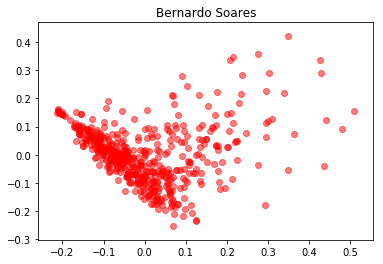

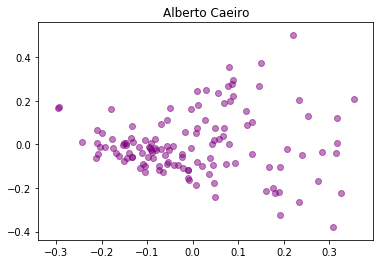

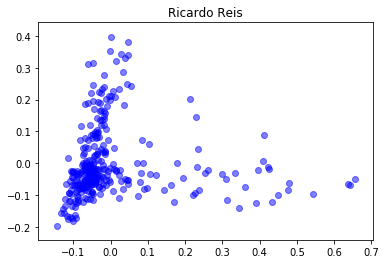

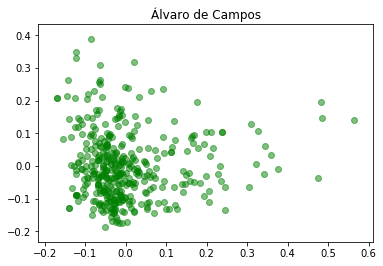

In [ ]:
data2D = PCA(n_components = 2).fit_transform(bernardo_tfidf.todense())
plt.scatter(data2D[:, 0], data2D[:, 1], c = 'red', alpha = 0.5)
plt.title('Bernardo Soares')
plt.show()

data2D = PCA(n_components = 2).fit_transform(alberto_tfidf.todense())
plt.scatter(data2D[:, 0], data2D[:, 1], c = 'purple', alpha = 0.5)
plt.title('Alberto Caeiro')
plt.show()

data2D = PCA(n_components = 2).fit_transform(ricardo_tfidf.todense())
plt.scatter(data2D[:, 0], data2D[:, 1], c = 'blue', alpha = 0.5)
plt.title('Ricardo Reis')
plt.show()

data2D = PCA(n_components = 2).fit_transform(campos_tfidf.todense())
plt.scatter(data2D[:, 0], data2D[:, 1], c = 'green', alpha = 0.5)
plt.title('Álvaro de Campos')
plt.show()